# Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.


In [1]:
import pandas as pd
import numpy as np

In [2]:
# convert smaller appropriate integer types;
transactions = pd.read_csv('../project_data/project_transactions.csv',
                           dtype={'DAY':'Int16','QUANTITY':'Int32','PRODUCT_ID':'Int32'},
                           usecols=['household_key','BASKET_ID','PRODUCT_ID','QUANTITY','SALES_VALUE','DAY'])
# Use the following snippet to create a Date Column.

transactions = ( 
    transactions 
    .assign(date = (pd.to_datetime("2016", format='%Y') 
                     + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days"))
           ).drop('DAY',axis=1)
)
transactions = transactions.set_index('date')
transactions.index.dtype

dtype('<M8[ns]')

In [4]:
transactions = transactions.sort_index()
transactions

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE
date,,,,,
2016-01-01,1364,26984896261,842930,1,2.19
2016-01-01,718,26985360571,952981,2,1.00
2016-01-01,718,26985360571,955043,1,0.50
2016-01-01,718,26985360571,962609,2,1.58
2016-01-01,718,26985360571,964968,1,1.50
...,...,...,...,...,...
2017-12-11,1845,42289526741,879528,1,1.06
2017-12-11,1845,42289526741,887201,1,3.99
2017-12-11,1845,42289526741,892573,1,3.49


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

<Axes: xlabel='date'>

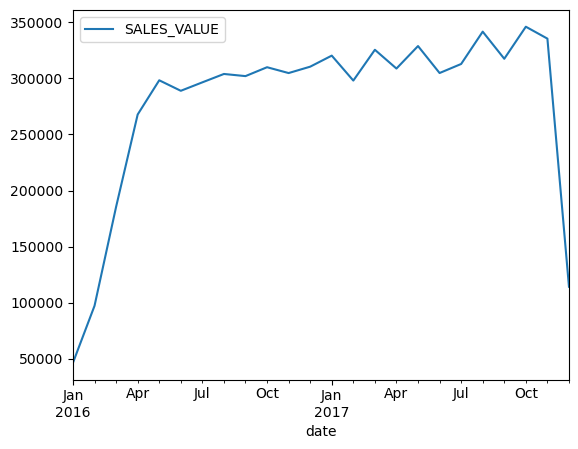

In [5]:
#plot the sum of sales

transactions.loc[:,['SALES_VALUE']].resample('ME').sum().plot()

<Axes: xlabel='date'>

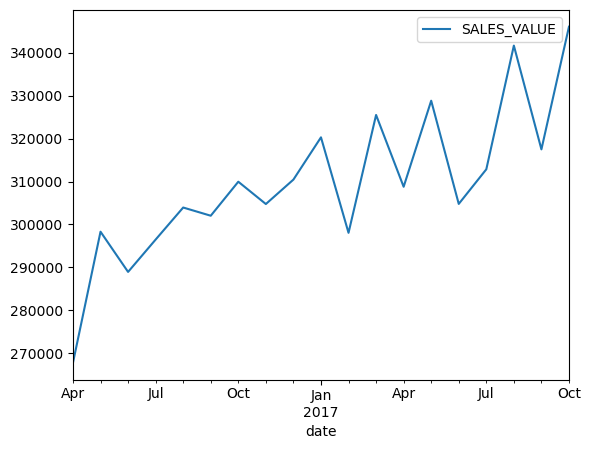

In [6]:
# plot the same series after filtering down to dates April 2016 and October 2017.
transactions.loc['2016-04-01':'2017-10-31'].iloc[:,[4]].resample('ME').sum().plot()

In [223]:
transactions.index

DatetimeIndex(['2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01',
               ...
               '2017-12-11', '2017-12-11', '2017-12-11', '2017-12-11',
               '2017-12-11', '2017-12-11', '2017-12-11', '2017-12-11',
               '2017-12-11', '2017-12-11'],
              dtype='datetime64[ns]', name='date', length=2146311, freq=None)

* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.


<Axes: xlabel='date'>

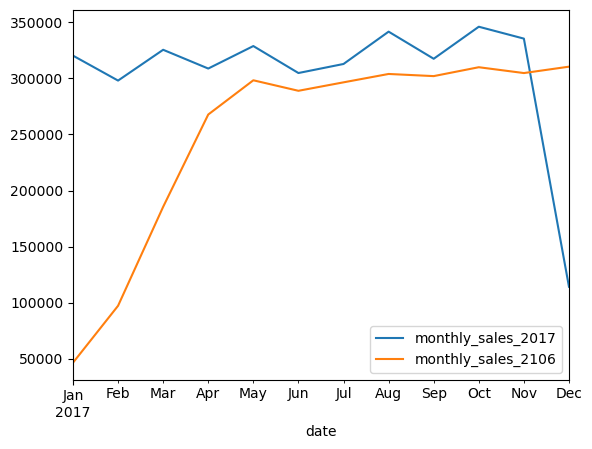

In [7]:
transaction_47 = transactions.iloc[:,[4]].resample('ME').sum()
transaction_47['monthly-sale-2016'] = transaction_47.shift(12)
transaction_47.columns = ['monthly_sales_2017','monthly_sales_2106']
transaction_47.loc['2017'].plot()

* Finally, plot total sales by day of week.

In [10]:
transactions['date'] = transactions.index

In [8]:
transactions.head(5)

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE
date,,,,,
2016-01-01,1364,26984896261,842930,1,2.19
2016-01-01,718,26985360571,952981,2,1.00
2016-01-01,718,26985360571,955043,1,0.50
2016-01-01,718,26985360571,962609,2,1.58
2016-01-01,718,26985360571,964968,1,1.50


<Axes: xlabel='date'>

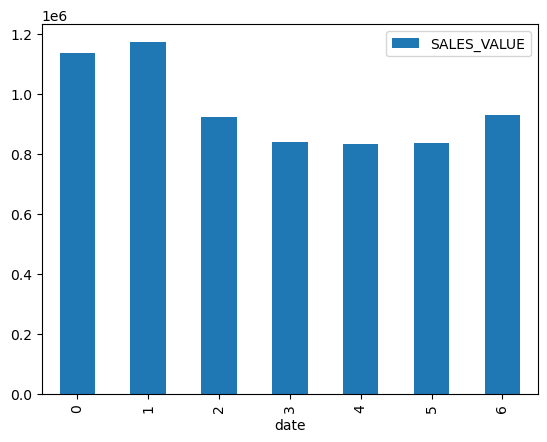

In [11]:
transactions.groupby(transactions['date'].dt.dayofweek).agg({'SALES_VALUE':'sum'}).plot.bar()

In [228]:
transactions= transactions.reset_index(drop=True)
transactions

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,718,26985360571,952981,2,1.00,2016-01-01
2,718,26985360571,955043,1,0.50,2016-01-01
3,718,26985360571,962609,2,1.58,2016-01-01
4,718,26985360571,964968,1,1.50,2016-01-01
...,...,...,...,...,...,...
2146306,1845,42289526741,879528,1,1.06,2017-12-11
2146307,1845,42289526741,887201,1,3.99,2017-12-11
2146308,1845,42289526741,892573,1,3.49,2017-12-11
2146309,1845,42289526741,908531,1,1.94,2017-12-11


# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [12]:
demographic = pd.read_csv('../project_data/hh_demographic.csv',
                          dtype={'AGE_DESC':'category','INCOME_DESC':'category','household_key':'Int16','HH_COMP_DESC':'category'},
                          usecols=['AGE_DESC','INCOME_DESC','household_key','HH_COMP_DESC']
                          
                         )


In [13]:
demographic

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16
...,...,...,...,...
796,35-44,50-74K,2 Adults No Kids,2494
797,45-54,75-99K,Unknown,2496
798,45-54,35-49K,Single Male,2497
799,25-34,50-74K,2 Adults No Kids,2498


In [15]:
#Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.

groupbyhousehold_id = transactions.groupby('household_key').agg({'SALES_VALUE':'sum'})
groupbyhousehold_id

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


In [16]:
#Once you've done that, join the demographics DataFrame to the aggregated transactions table. 
demographic_demo =  demographic.merge(groupbyhousehold_id,how='left',left_on='household_key',right_on='household_key')
demographic_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    Int16   
 4   SALES_VALUE    668 non-null    float64 
dtypes: Int16(1), category(3), float64(1)
memory usage: 11.9 KB


In [17]:
#sum of sales by age_desc
sumofsales = demographic_demo.groupby('AGE_DESC',observed=True)[['SALES_VALUE']].sum()
sumofsales



,SALES_VALUE
AGE_DESC,
19-24,182991.03
25-34,635955.55
35-44,986670.19
45-54,1328371.19
55-64,258446.21
65+,260456.19


<Axes: xlabel='AGE_DESC'>

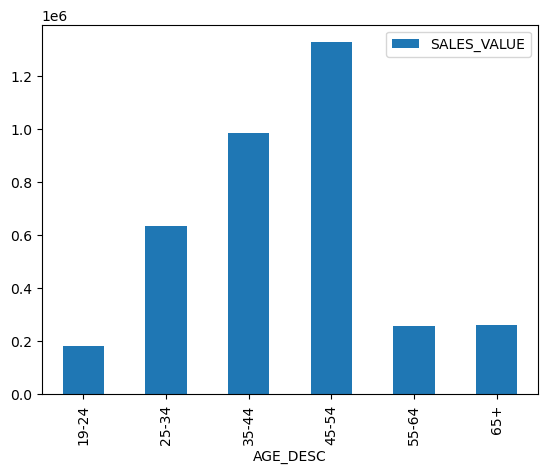

In [18]:
sumofsales.plot.bar()


<Axes: xlabel='INCOME_DESC'>

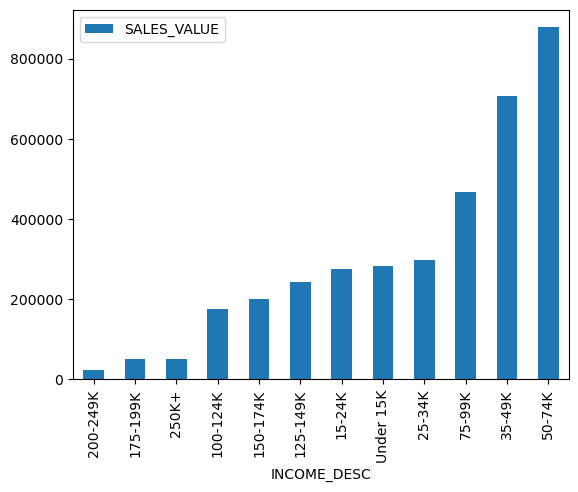

In [19]:
# income_sales
income_sales = demographic_demo.groupby('INCOME_DESC',observed=True)[['SALES_VALUE']].sum()
income_sales.sort_values(by='SALES_VALUE').plot.bar()

* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?



In [20]:
calculate_pivot_table = demographic_demo.pivot_table(index='AGE_DESC',columns='HH_COMP_DESC',values='SALES_VALUE',aggfunc='mean',observed=True,margins=True).style.background_gradient(cmap='RdYlGn',axis=None)
calculate_pivot_table

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000,4692.077692
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000,5435.517521
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818,6090.556728
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682,5534.879958
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000,5168.924200
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000,4340.936500
All,6032.802143,6280.069103,5599.857756,4895.928361,4544.646750,4936.127778,5468.398743


# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [21]:
product = pd.read_csv('../project_data/product.csv',usecols=['PRODUCT_ID','DEPARTMENT'],dtype={'PRODUCT_ID':'Int64','DEPARTMENT':'category'})
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PRODUCT_ID  92353 non-null  Int64   
 1   DEPARTMENT  92353 non-null  category
dtypes: Int64(1), category(1)
memory usage: 903.4 KB


In [22]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
date,,,,,,
2016-01-01,1364,26984896261,842930,1,2.19,2016-01-01
2016-01-01,718,26985360571,952981,2,1.00,2016-01-01
2016-01-01,718,26985360571,955043,1,0.50,2016-01-01
2016-01-01,718,26985360571,962609,2,1.58,2016-01-01
2016-01-01,718,26985360571,964968,1,1.50,2016-01-01


In [23]:
demographic.head()

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16


In [24]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2146311 entries, 2016-01-01 to 2017-12-11
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   household_key  int64         
 1   BASKET_ID      int64         
 2   PRODUCT_ID     Int32         
 3   QUANTITY       Int32         
 4   SALES_VALUE    float64       
 5   date           datetime64[ns]
dtypes: Int32(2), datetime64[ns](1), float64(1), int64(2)
memory usage: 134.6 MB


In [39]:
#Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.
trans_demo_dept = (transactions
                  .merge(demographic, 
                         how="inner",
                         left_on='household_key',
                         right_on="household_key",)
                  .merge(product,
                         how="inner",
                         left_on="PRODUCT_ID",
                         right_on="PRODUCT_ID")
             
             )

trans_demo_dept

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date,AGE_DESC,INCOME_DESC,HH_COMP_DESC,DEPARTMENT
0,1364,26984896261,842930,1,2.19,2016-01-01,65+,100-124K,Single Female,GROCERY
1,718,26985360571,952981,2,1.00,2016-01-01,45-54,25-34K,2 Adults Kids,GROCERY
2,718,26985360571,955043,1,0.50,2016-01-01,45-54,25-34K,2 Adults Kids,GROCERY
3,718,26985360571,962609,2,1.58,2016-01-01,45-54,25-34K,2 Adults Kids,GROCERY
4,718,26985360571,964968,1,1.50,2016-01-01,45-54,25-34K,2 Adults Kids,MEAT-PCKGD
...,...,...,...,...,...,...,...,...,...,...
1161570,1845,42289526741,868684,1,3.79,2017-12-11,45-54,175-199K,2 Adults Kids,DRUG GM
1161571,1845,42289526741,879528,1,1.06,2017-12-11,45-54,175-199K,2 Adults Kids,PRODUCE
1161572,1845,42289526741,887201,1,3.99,2017-12-11,45-54,175-199K,2 Adults Kids,PRODUCE
1161573,1845,42289526741,892573,1,3.49,2017-12-11,45-54,175-199K,2 Adults Kids,DRUG GM


In [50]:
join_table = (trans_demo_dept.pivot_table(index="DEPARTMENT",
                            columns="AGE_DESC",
                            values="SALES_VALUE",
                            fill_value=0,       # Replace NaN with 0
                            aggfunc="sum",observed=True)
 .style.background_gradient(cmap="RdYlGn", axis=1))
join_table

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640000,21.250000,72.580000,55.920000,0.000000,16.370000
CHEF SHOPPE,81.300000,134.160000,348.530000,418.240000,80.860000,149.240000
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630000,2273.030000,4362.020000,5187.570000,986.260000,600.900000
COUP/STR & MFG,7.490000,48.420000,121.200000,154.550000,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300000,18181.940000,34577.290000,44334.220000,9850.540000,10462.330000
DELI/SNACK BAR,0.000000,0.000000,6.980000,1.560000,0.000000,3.310000


# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [56]:
join_table.to_excel("demographic_category_sales.xlsx", sheet_name="sales_pivot")